# Load Library

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from IPython.display import display

# Data Preparation

## Load Dataset

In [104]:
dataset = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/data_retail.csv", sep=";")

display(dataset.head())

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


# Exploration of Dataset

### Drop Useless Columns

In [105]:
dataset = dataset.drop(["no","Row_Num"], axis=1)

display(dataset.head())

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jaket,1466304274396,1538718482608,1467681,22
1,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,141526,Tas,1493349147000,1548322802000,310915,30
3,141526,Jaket,1493362372547,1547643603911,722632,27
4,37545,Sepatu,1429178498531,1542891221530,1775036,25


### Checking Dimension of Dataset

In [106]:
print("Dimension of Dataset = %d Rows %d Columns"%dataset.shape)

Dimension of Dataset = 100000 Rows 6 Columns


### Checking Existing of Missing Value

In [107]:
print("Checking Existing of Missing Values = ?")
display(dataset.isnull().sum())

Checking Existing of Missing Values = ?


Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
dtype: int64

# Data Analysis

## Change TimeStamp to Datetime

In [108]:
df_analysis = dataset.copy()

In [109]:
df_analysis["First_Transaction"] = pd.to_datetime(df_analysis["First_Transaction"]/1000, unit="s").dt.date
df_analysis["Last_Transaction"] = pd.to_datetime(df_analysis["Last_Transaction"]/1000, unit="s").dt.date

In [110]:
display(df_analysis.head(10))

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jaket,2016-06-19,2018-10-05,1467681,22
1,29531,Sepatu,2014-07-23,2018-12-25,1269337,41
2,141526,Tas,2017-04-28,2019-01-24,310915,30
3,141526,Jaket,2017-04-28,2019-01-16,722632,27
4,37545,Sepatu,2015-04-16,2018-11-22,1775036,25
5,37545,Tas,2018-02-21,2018-11-23,298375,22
6,65342,Sepatu,2016-02-05,2018-11-23,2128787,71
7,40717,Sepatu,2015-03-12,2018-08-24,894521,21
8,39435,Sepatu,2015-02-12,2018-10-31,2204904,124
9,25636,Sepatu,2014-07-13,2018-12-20,1213485,89


## Making GMV Columns 

In [111]:
df_analysis["GMV"] = df_analysis["Average_Transaction_Amount"] * df_analysis["Count_Transaction"]

## Checking Max Last Transaction

In [112]:
max_lasttime = df_analysis["Last_Transaction"].max()

display(max_lasttime)

datetime.date(2019, 2, 1)

In [113]:
df_analysis["time_last_transaction"] = round((max_lasttime - df_analysis["Last_Transaction"]).dt.days/30)

display(df_analysis)

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,GMV,time_last_transaction
0,29531,Jaket,2016-06-19,2018-10-05,1467681,22,32288982,4.0
1,29531,Sepatu,2014-07-23,2018-12-25,1269337,41,52042817,1.0
2,141526,Tas,2017-04-28,2019-01-24,310915,30,9327450,0.0
3,141526,Jaket,2017-04-28,2019-01-16,722632,27,19511064,1.0
4,37545,Sepatu,2015-04-16,2018-11-22,1775036,25,44375900,2.0
...,...,...,...,...,...,...,...,...
99995,56249,Jaket,2016-06-01,2016-06-01,298662,1,298662,32.0
99996,56249,Sepatu,2017-02-09,2017-02-09,349556,1,349556,24.0
99997,34157,Jaket,2015-08-30,2015-08-30,598013,1,598013,42.0
99998,34157,Sepatu,2014-11-14,2014-11-14,1208591,1,1208591,51.0


In [114]:
print("Information of Dataset = ?")
display(df_analysis.info())

Information of Dataset = ?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer_ID                 100000 non-null  int64  
 1   Product                     100000 non-null  object 
 2   First_Transaction           100000 non-null  object 
 3   Last_Transaction            100000 non-null  object 
 4   Average_Transaction_Amount  100000 non-null  int64  
 5   Count_Transaction           100000 non-null  int64  
 6   GMV                         100000 non-null  int64  
 7   time_last_transaction       100000 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 6.1+ MB


None

In [115]:
df_analysis["status_churn"] = df_analysis["time_last_transaction"].apply(lambda x: "No Churn" if x <=5 else "Churn")

display(df_analysis.head(10))

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,GMV,time_last_transaction,status_churn
0,29531,Jaket,2016-06-19,2018-10-05,1467681,22,32288982,4.0,No Churn
1,29531,Sepatu,2014-07-23,2018-12-25,1269337,41,52042817,1.0,No Churn
2,141526,Tas,2017-04-28,2019-01-24,310915,30,9327450,0.0,No Churn
3,141526,Jaket,2017-04-28,2019-01-16,722632,27,19511064,1.0,No Churn
4,37545,Sepatu,2015-04-16,2018-11-22,1775036,25,44375900,2.0,No Churn
5,37545,Tas,2018-02-21,2018-11-23,298375,22,6564250,2.0,No Churn
6,65342,Sepatu,2016-02-05,2018-11-23,2128787,71,151143877,2.0,No Churn
7,40717,Sepatu,2015-03-12,2018-08-24,894521,21,18784941,5.0,No Churn
8,39435,Sepatu,2015-02-12,2018-10-31,2204904,124,273408096,3.0,No Churn
9,25636,Sepatu,2014-07-13,2018-12-20,1213485,89,108000165,1.0,No Churn


## Making clean_dataset

In [117]:
clean_dataset = df_analysis[["Customer_ID", "Product", "First_Transaction",	"Last_Transaction",	"Average_Transaction_Amount", "Count_Transaction","GMV","status_churn"]]

display(clean_dataset.head(10))

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,GMV,status_churn
0,29531,Jaket,2016-06-19,2018-10-05,1467681,22,32288982,No Churn
1,29531,Sepatu,2014-07-23,2018-12-25,1269337,41,52042817,No Churn
2,141526,Tas,2017-04-28,2019-01-24,310915,30,9327450,No Churn
3,141526,Jaket,2017-04-28,2019-01-16,722632,27,19511064,No Churn
4,37545,Sepatu,2015-04-16,2018-11-22,1775036,25,44375900,No Churn
5,37545,Tas,2018-02-21,2018-11-23,298375,22,6564250,No Churn
6,65342,Sepatu,2016-02-05,2018-11-23,2128787,71,151143877,No Churn
7,40717,Sepatu,2015-03-12,2018-08-24,894521,21,18784941,No Churn
8,39435,Sepatu,2015-02-12,2018-10-31,2204904,124,273408096,No Churn
9,25636,Sepatu,2014-07-13,2018-12-20,1213485,89,108000165,No Churn


## Checking The Total of Customer

In [118]:
total_customer = clean_dataset["Customer_ID"].nunique()
display(total_customer)

73194

## Data Visualization

### Checking Distribution of Status Churn

In [120]:
df_status_churn = pd.DataFrame(clean_dataset["status_churn"].value_counts()).reset_index().rename(columns={"index":"Status", "status_churn":"Count Users"})
display(df_status_churn)

,Status,Count Users
0,Churn,68668
1,No Churn,31332


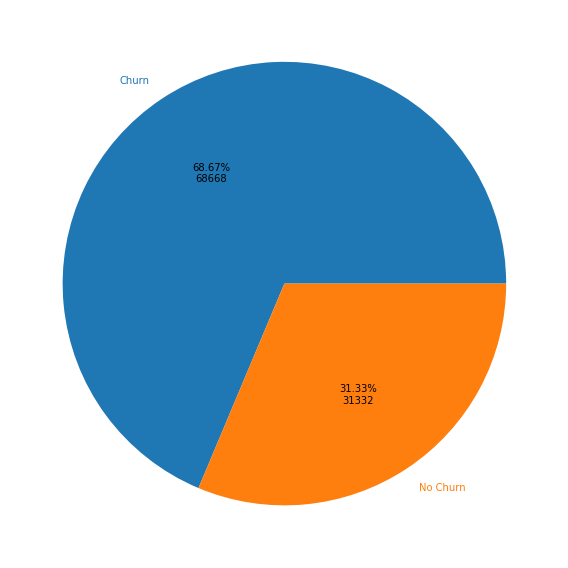

In [123]:
def autopct(pct, data):
  absolute_value = int(pct/100*np.sum(data))
  return "{:0.2f}%\n{}".format(pct, absolute_value)

fig, axs = plt.subplots(figsize=(8, 8))
pacthes, texts, pcts = axs.pie(
                                x=df_status_churn["Count Users"],
                                labels=df_status_churn["Status"],
                                autopct=lambda pct:autopct(pct, df_status_churn["Count Users"])
                              )
for i, pacth in enumerate(pacthes):
  texts[i].set_color(pacth.get_facecolor())

plt.tight_layout()
plt.show()